<a href="https://colab.research.google.com/github/aditya-eats-food/project_aryan_neelam_aditya/blob/main/phonetic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
# Path to your audio dataset in Google Drive
audio_dataset_path = "/content/drive/MyDrive/audio_dataset/*.wav"
# Get a list of all audio files and sort them
audio_files = sorted(glob.glob(audio_dataset_path), key=lambda x: os.path.basename(x))
# Check if any audio files were found
if not audio_files:
    print("⚠️ No audio files found in the specified directory.")
else:
    print(f"Found {len(audio_files)} audio files.")
    for file in audio_files:
        print(f"🔊 Audio file: {os.path.basename(file)}")

Found 34 audio files.
🔊 Audio file: Biplo Kuli Assamese Filtered.wav
🔊 Audio file: Biplo Kuli Mising Filtered.wav
🔊 Audio file: Dimpi Assamese.wav
🔊 Audio file: Dimpi Mising.wav
🔊 Audio file: Duna Taid Assamese Filtered.wav
🔊 Audio file: Duna Taid Mising Filtered.wav
🔊 Audio file: Ghana Kanta Payeng Assamese Filtered.wav
🔊 Audio file: Ghana Kanta Payeng Mising Filtered.wav
🔊 Audio file: Ifshita Assamese.wav
🔊 Audio file: Ifshita Mising.wav
🔊 Audio file: Kangkana pegu Assamese.wav
🔊 Audio file: Kangkana pegu Mising.wav
🔊 Audio file: Kushal Payeng Assamese Filtered.wav
🔊 Audio file: Kushal Payeng Mising Filtered.wav
🔊 Audio file: Lakhi Doley Assamese Filtered.wav
🔊 Audio file: Lakhi Doley Mising Filtered.wav
🔊 Audio file: Monalisa Assamese.wav
🔊 Audio file: Monalisa Mising.wav
🔊 Audio file: Mrigank Pegu Assamese Filtered.wav
🔊 Audio file: Mrigank Pegu Mising Filtered.wav
🔊 Audio file: Nikhita Assamese.wav
🔊 Audio file: Nikhita Mising.wav
🔊 Audio file: Pahi Assamese.wav
🔊 Audio file: Pahi

In [ ]:
import librosa
import IPython.display as ipd
import os
# Function to play 15 seconds of an audio file
def play_audio_segment(file_name, duration=15, sr=16000):
    # Construct the full path to the audio file
    file_path = os.path.join("/content/drive/MyDrive/audio_dataset", file_name)
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"⚠️ File not found: {file_name}")
        return
    # Load the audio file
    audio, _ = librosa.load(file_path, sr=sr)
    # Calculate the number of samples for 15 seconds
    samples_15s = duration * sr
    # Play the first 15 seconds
    ipd.display(ipd.Audio(audio[:samples_15s], rate=sr))
# Specify the audio file name directly
audio_file_name = "Duna Taid Assamese Filtered.wav"  # Change this to your desired file name
# Play the audio segment
play_audio_segment(audio_file_name)

In [ ]:
import librosa
import IPython.display as ipd
import os
# Function to play 15 seconds of an audio file
def play_audio_segment(file_name, duration=15, sr=16000):
    # Construct the full path to the audio file
    file_path = os.path.join("/content/drive/MyDrive/audio_dataset", file_name)
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"⚠️ File not found: {file_name}")
        return
    # Load the audio file
    audio, _ = librosa.load(file_path, sr=sr)
    # Calculate the number of samples for 15 seconds
    samples_15s = duration * sr
    # Play the first 15 seconds
    ipd.display(ipd.Audio(audio[:samples_15s], rate=sr))
# Specify the audio file name directly
audio_file_name = "Duna Taid Mising Filtered.wav"  # Change this to your desired file name
# Play the audio segment
play_audio_segment(audio_file_name)

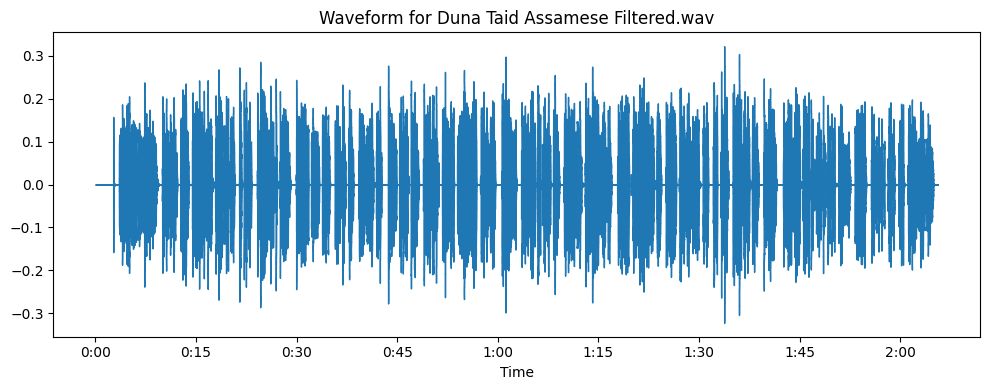

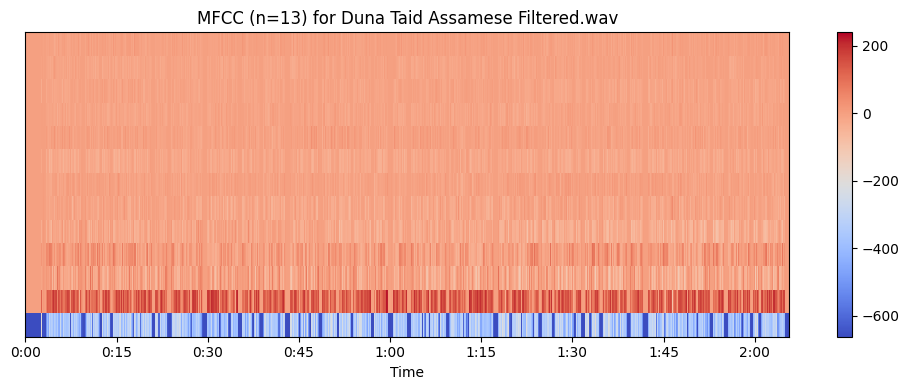

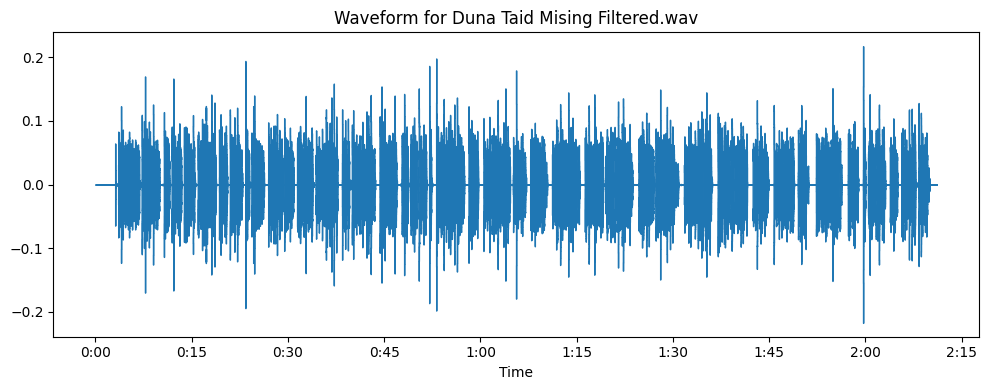

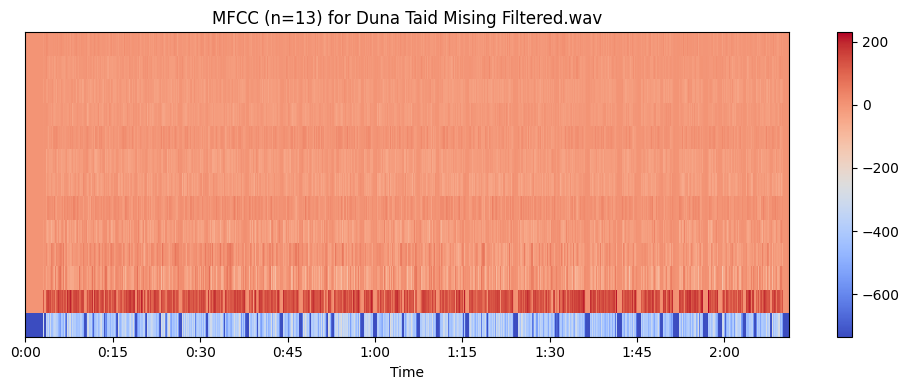

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
def plot_waveform(file_name, sr=16000):
    file_path = os.path.join("/content/drive/MyDrive/audio_dataset", file_name)
    y, sr = librosa.load(file_path, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform for {file_name}")
    plt.tight_layout()
    plt.show()
def plot_mfcc(file_name, sr=16000, n_mfcc=13):
    file_path = os.path.join("/content/drive/MyDrive/audio_dataset", file_name)
    y, sr = librosa.load(file_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title(f'MFCC (n={n_mfcc}) for {file_name}')
    plt.tight_layout()
    plt.show()
# For Assamese audio
plot_waveform("Duna Taid Assamese Filtered.wav")
plot_mfcc("Duna Taid Assamese Filtered.wav")
# For Mising audio
plot_waveform("Duna Taid Mising Filtered.wav")
plot_mfcc("Duna Taid Mising Filtered.wav")

ADDITIONAL ACOUSTIC FEATURES

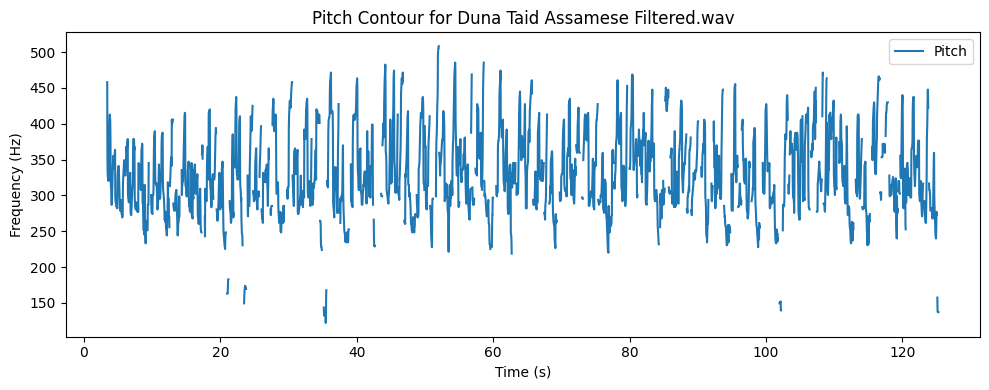

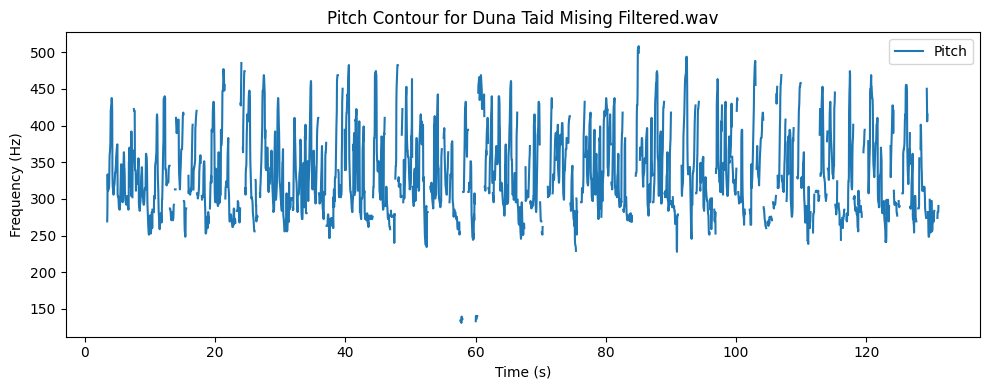

In [ ]:
def plot_pitch_contour(file_name, sr=16000):
    file_path = os.path.join("/content/drive/MyDrive/audio_dataset", file_name)
    y, sr = librosa.load(file_path, sr=sr)
    # Using librosa's pyin to estimate pitch
    pitches, voiced_flag, _ = librosa.pyin(y, fmin=librosa.note_to_hz('C2'),
                                            fmax=librosa.note_to_hz('C7'))
    times = librosa.times_like(pitches, sr=sr)

    plt.figure(figsize=(10, 4))
    plt.plot(times, pitches, label="Pitch")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title(f"Pitch Contour for {file_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot pitch contours for both files
plot_pitch_contour("Duna Taid Assamese Filtered.wav")
plot_pitch_contour("Duna Taid Mising Filtered.wav")

FORMANT EXTRACTION

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


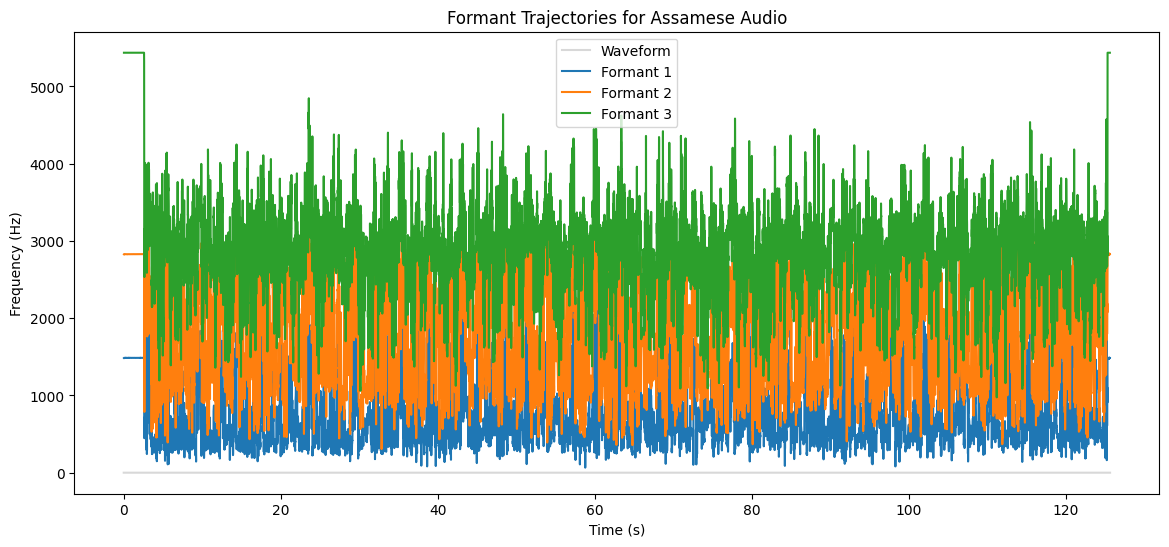

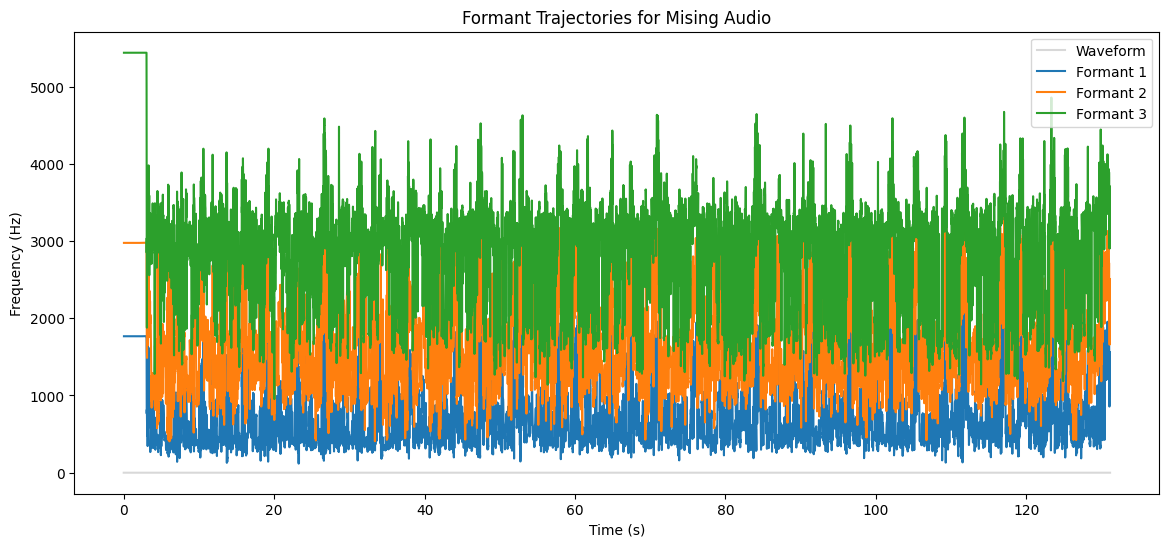

In [ ]:
!pip install praat-parselmouth
import parselmouth
import matplotlib.pyplot as plt
import numpy as np

def extract_formants(file_path, time_step=0.01, max_number_of_formants=5,
                     max_formant=5500, window_length=0.025, pre_emphasis=50):
    """
    Extract formant information using the Burg method.
    """
    sound = parselmouth.Sound(file_path)
    formant = sound.to_formant_burg(time_step=time_step,
                                    max_number_of_formants=max_number_of_formants,
                                    maximum_formant=max_formant,
                                    window_length=window_length,
                                    pre_emphasis_from=pre_emphasis)  # Note the change here
    return sound, formant

def plot_formants(sound, formant, file_name, num_formants_to_plot=3):
    """
    Plot the sound waveform along with the first few formant trajectories.
    """
    plt.figure(figsize=(14,6))
    plt.title(f"Formant Trajectories for {file_name}")
    t = np.linspace(0, sound.duration, sound.get_number_of_samples())
    # Plot a transparent waveform for context
    plt.plot(t, sound.values.T, color='grey', alpha=0.3, label='Waveform')
    times = np.arange(formant.get_start_time(), formant.get_end_time(), formant.get_time_step())
    for formant_number in range(1, num_formants_to_plot+1):
        f_values = [formant.get_value_at_time(formant_number, time) for time in times]
        plt.plot(times, f_values, label=f"Formant {formant_number}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.legend()
    plt.show()

# Example usage for Assamese audio:
file_path_assamese = "/content/drive/MyDrive/audio_dataset/Duna Taid Assamese Filtered.wav"
sound_assamese, formant_assamese = extract_formants(file_path_assamese)
plot_formants(sound_assamese, formant_assamese, "Assamese Audio")

# Example usage for Mising audio:
file_path_mising = "/content/drive/MyDrive/audio_dataset/Duna Taid Mising Filtered.wav"
sound_mising, formant_mising = extract_formants(file_path_mising)
plot_formants(sound_mising, formant_mising, "Mising Audio")

Rhythm Analysis for Assamese Audio:


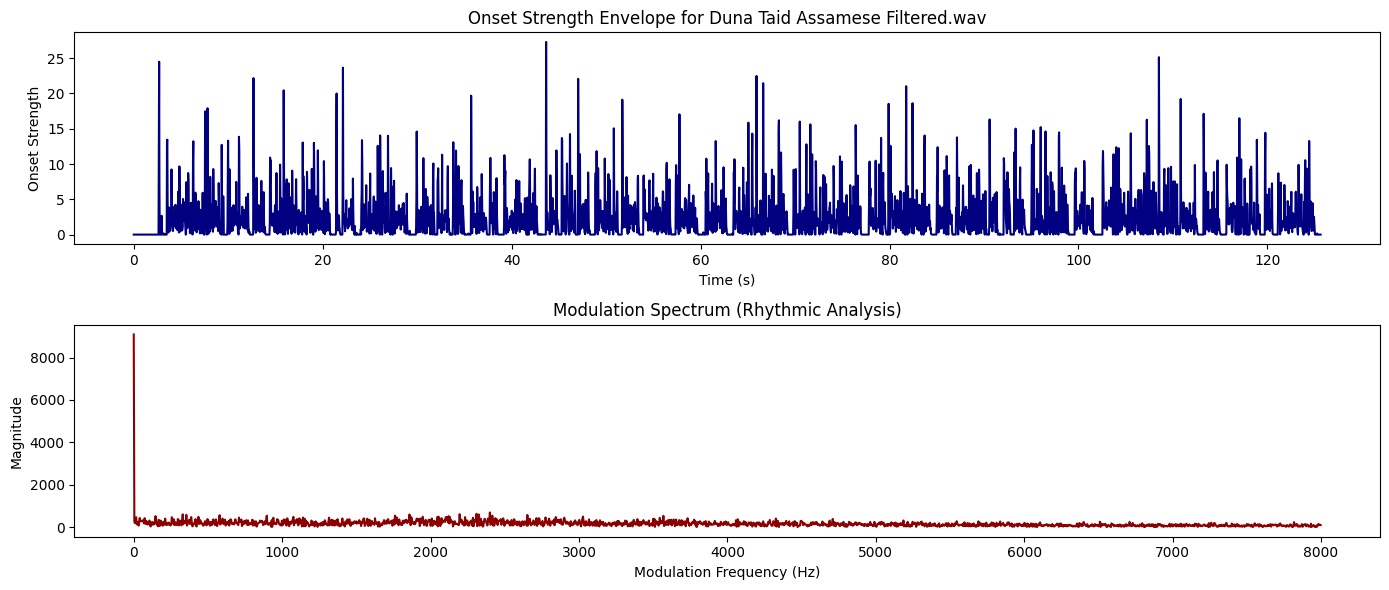

Rhythm Analysis for Mising Audio:


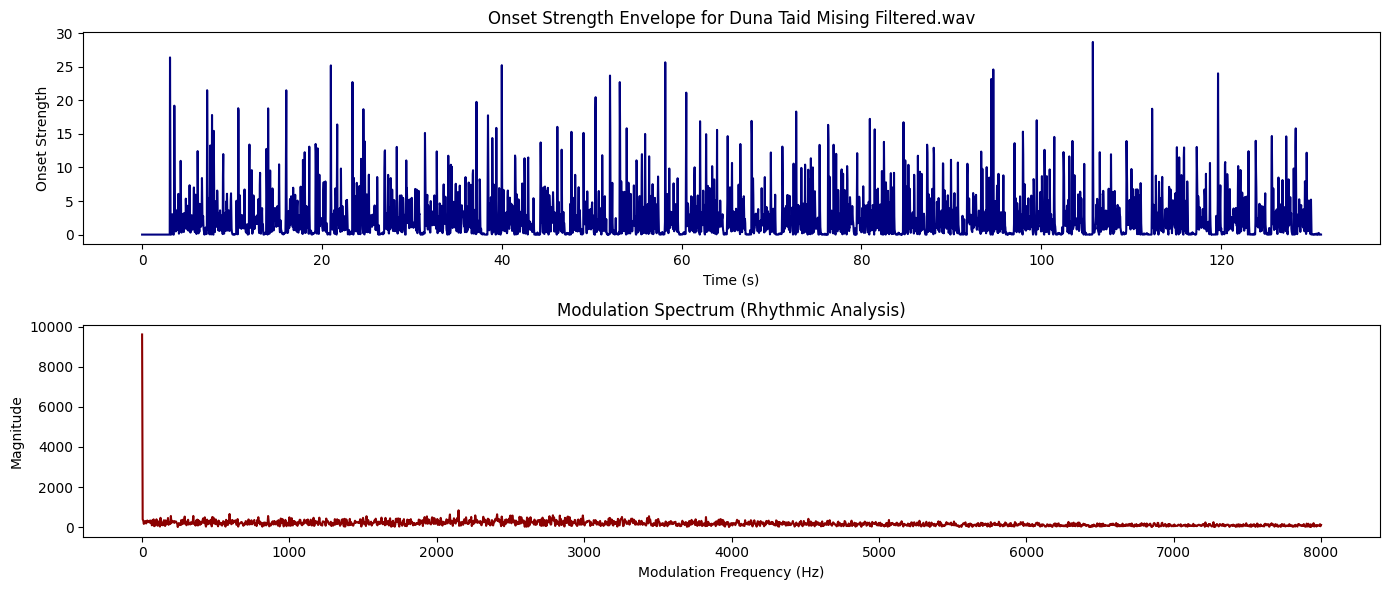

In [ ]:
import librosa
import librosa.display

def rhythm_formant_analysis(file_path, sr=16000):
    """
    Perform a basic rhythm formant analysis by examining the
    onset strength envelope and its modulation spectrum.

    Parameters:
      file_path (str): path to the audio file.
      sr (int): sampling rate for loading the file.

    Displays:
      Two plots: one for the onset strength envelope and one for its modulation spectrum.
    """
    y, sr = librosa.load(file_path, sr=sr)

    # Extract the onset envelope, representing the temporal dynamics
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    times = librosa.times_like(onset_env, sr=sr)

    # Compute the FFT of the onset envelope to analyze rhythmic modulations
    fft_onset = np.fft.rfft(onset_env)
    freqs = np.fft.rfftfreq(len(onset_env), d=1/sr)

    # Plot the onset strength envelope
    plt.figure(figsize=(14, 6))

    plt.subplot(2, 1, 1)
    plt.plot(times, onset_env, color='navy')
    plt.title(f"Onset Strength Envelope for {file_path.split('/')[-1]}")
    plt.xlabel("Time (s)")
    plt.ylabel("Onset Strength")

    # Plot the modulation spectrum from the onset envelope
    plt.subplot(2, 1, 2)
    plt.plot(freqs, np.abs(fft_onset), color='darkred')
    plt.title("Modulation Spectrum (Rhythmic Analysis)")
    plt.xlabel("Modulation Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.tight_layout()
    plt.show()

# Example usage for rhythm analysis:
print("Rhythm Analysis for Assamese Audio:")
rhythm_formant_analysis(file_path_assamese)

print("Rhythm Analysis for Mising Audio:")
rhythm_formant_analysis(file_path_mising)

MFCC COMPARISON

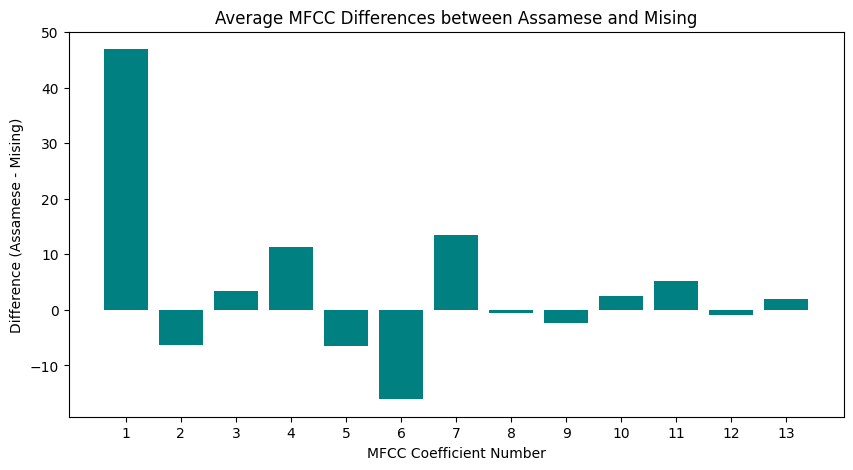

    MFCC Coefficient  Assamese (Avg)  Mising (Avg)  Difference
0                  1     -411.410980   -458.369202   46.958221
1                  2      104.977180    111.271980   -6.294800
2                  3      -10.766701    -14.126939    3.360238
3                  4        9.164788     -2.170520   11.335308
4                  5      -21.079584    -14.547680   -6.531904
5                  6      -12.054516      4.037879  -16.092394
6                  7       -3.808740    -17.217327   13.408587
7                  8      -16.534239    -16.021666   -0.512573
8                  9       -2.912787     -0.576918   -2.335869
9                 10       -9.548506    -12.018288    2.469782
10                11       -9.138518    -14.280966    5.142447
11                12       -8.113277     -7.232361   -0.880916
12                13       -2.963564     -4.991632    2.028067


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def extract_mfcc(file_path, sr=16000, n_mfcc=13):
    """
    Extract MFCC features from an audio file.

    Parameters:
      file_path (str): Path to the audio file.
      sr (int): Sampling rate.
      n_mfcc (int): Number of MFCC coefficients to extract.

    Returns:
      mfcc (np.array): MFCC feature matrix (n_mfcc x n_frames).
    """
    y, sr = librosa.load(file_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc

# File paths for both recordings
file_path_assamese = "/content/drive/MyDrive/audio_dataset/Duna Taid Assamese Filtered.wav"
file_path_mising = "/content/drive/MyDrive/audio_dataset/Duna Taid Mising Filtered.wav"

# Extract MFCC for each language
mfcc_assamese = extract_mfcc(file_path_assamese)
mfcc_mising = extract_mfcc(file_path_mising)

# Average the MFCC values along the time dimension (axis=1)
avg_mfcc_assamese = np.mean(mfcc_assamese, axis=1)
avg_mfcc_mising = np.mean(mfcc_mising, axis=1)

# Compute the difference (Assamese minus Mising)
difference = avg_mfcc_assamese - avg_mfcc_mising

# Plot the differences
coefficients = np.arange(1, len(avg_mfcc_assamese)+1)
plt.figure(figsize=(10, 5))
plt.bar(coefficients, difference, color='teal')
plt.xlabel('MFCC Coefficient Number')
plt.ylabel('Difference (Assamese - Mising)')
plt.title('Average MFCC Differences between Assamese and Mising')
plt.xticks(coefficients)
plt.show()

# Create a table to summarize the data
df = pd.DataFrame({
    "MFCC Coefficient": coefficients,
    "Assamese (Avg)": avg_mfcc_assamese,
    "Mising (Avg)": avg_mfcc_mising,
    "Difference": difference
})
print(df)

Segment-wise Average MFCC Features Comparison:
    Segment  MFCC_1_Assamese  MFCC_1_Mising  MFCC_1_Diff  MFCC_2_Assamese  \
0         1      -555.265747    -652.821228    97.555481        47.063053   
1         2      -411.751373    -416.969788     5.218414       113.828896   
2         3      -391.307434    -472.772003    81.464569       106.813644   
3         4      -347.829742    -440.146545    92.316803       121.053581   
4         5      -429.713715    -434.164398     4.450684        95.040337   
5         6      -420.908081    -438.925262    18.017181       105.878555   
6         7      -415.737244    -445.483490    29.746246       134.390671   
7         8      -445.621765    -450.793335     5.171570        88.017738   
8         9      -419.446716    -438.793396    19.346680       105.937012   
9        10      -406.154297    -451.262726    45.108429        97.840958   
10       11      -375.089233    -433.557281    58.468048        89.390137   
11       12      -407.544403 

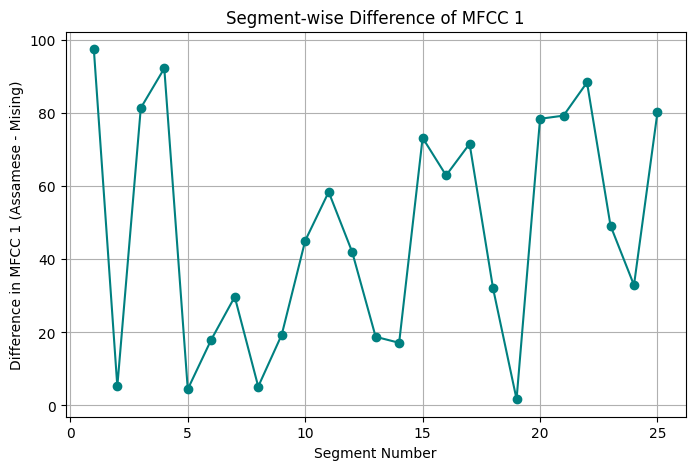

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def segment_audio(file_path, segment_duration=5, sr=16000):

    y, sr = librosa.load(file_path, sr=sr)
    total_samples = len(y)
    segment_length = int(segment_duration * sr)
    num_segments = total_samples // segment_length  # discard a remainder

    segments = []
    for i in range(num_segments):
        start = i * segment_length
        end = start + segment_length
        segments.append(y[start:end])
    return segments

def extract_avg_mfcc(segment, sr=16000, n_mfcc=13):

    mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=n_mfcc)
    avg_mfcc = np.mean(mfcc, axis=1)
    return avg_mfcc

# Define file paths for the paired recordings.
file_path_assamese = "/content/drive/MyDrive/audio_dataset/Duna Taid Assamese Filtered.wav"
file_path_mising   = "/content/drive/MyDrive/audio_dataset/Duna Taid Mising Filtered.wav"

# Choose a segment duration in seconds (adjust as needed)
segment_duration = 5

# Segment both recordings
segments_assamese = segment_audio(file_path_assamese, segment_duration=segment_duration, sr=16000)
segments_mising   = segment_audio(file_path_mising, segment_duration=segment_duration, sr=16000)

# Ensure we compare only the segments that are present in both files
num_segments = min(len(segments_assamese), len(segments_mising))
segments_assamese = segments_assamese[:num_segments]
segments_mising   = segments_mising[:num_segments]

# For each segment, extract average MFCC features.
n_mfcc = 13
avg_mfcc_assamese = [extract_avg_mfcc(seg, sr=16000, n_mfcc=n_mfcc) for seg in segments_assamese]
avg_mfcc_mising   = [extract_avg_mfcc(seg, sr=16000, n_mfcc=n_mfcc) for seg in segments_mising]

# Organize the segment data for easier comparison (one row = one segment)
df_list = []
for i in range(num_segments):
    segment_data = {
        "Segment": i+1,
    }
    for j in range(n_mfcc):
        segment_data[f"MFCC_{j+1}_Assamese"] = avg_mfcc_assamese[i][j]
        segment_data[f"MFCC_{j+1}_Mising"]   = avg_mfcc_mising[i][j]
        # Optional: Save the difference directly
        segment_data[f"MFCC_{j+1}_Diff"]     = avg_mfcc_assamese[i][j] - avg_mfcc_mising[i][j]
    df_list.append(segment_data)

# Create a DataFrame to show the segment-wise data.
df_segments = pd.DataFrame(df_list)
print("Segment-wise Average MFCC Features Comparison:")
print(df_segments)

# For visualization, let's plot the difference for the 1st MFCC coefficient across segments.
mfcc1_diffs = df_segments["MFCC_1_Diff"]

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, num_segments+1), mfcc1_diffs, marker='o', linestyle='-', color='teal')
plt.xlabel("Segment Number")
plt.ylabel("Difference in MFCC 1 (Assamese - Mising)")
plt.title("Segment-wise Difference of MFCC 1")
plt.grid(True)
plt.show()

In [ ]:
import librosa
import numpy as np
import pandas as pd

def compute_acoustic_parameters(file_path, sr=16000, n_mfcc=13):
    # Load audio
    y, sr = librosa.load(file_path, sr=sr)

    # Compute MFCC features and their summary statistics
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    avg_mfcc = np.mean(mfcc, axis=1)
    std_mfcc = np.std(mfcc, axis=1)

    # Compute pitch (F0) using librosa.pyin
    f0, voiced_flag, _ = librosa.pyin(y,
                                      fmin=librosa.note_to_hz('C2'),
                                      fmax=librosa.note_to_hz('C7'))
    # Remove unvoiced frames (NaN values) and compute stats
    f0_voiced = f0[~np.isnan(f0)]
    mean_f0 = np.mean(f0_voiced) if len(f0_voiced) > 0 else 0
    std_f0 = np.std(f0_voiced) if len(f0_voiced) > 0 else 0

    return avg_mfcc, std_mfcc, mean_f0, std_f0

# Define file paths for Assamese and Mising recordings
file_path_assamese = "/content/drive/MyDrive/audio_dataset/Duna Taid Assamese Filtered.wav"
file_path_mising   = "/content/drive/MyDrive/audio_dataset/Duna Taid Mising Filtered.wav"

# Compute acoustic parameters for both files
avg_mfcc_assamese, std_mfcc_assamese, mean_f0_assamese, std_f0_assamese = compute_acoustic_parameters(file_path_assamese)
avg_mfcc_mising,   std_mfcc_mising,   mean_f0_mising,   std_f0_mising   = compute_acoustic_parameters(file_path_mising)

# Create a table for MFCC parameters row-by-row for each coefficient.
coeff_number = np.arange(1, len(avg_mfcc_assamese) + 1)
df_mfcc = pd.DataFrame({
    "MFCC Coefficient": coeff_number,
    "Assamese (Mean ± SD)": [
        f"{avg_mfcc_assamese[i]:.2f} ± {std_mfcc_assamese[i]:.2f}" for i in range(len(avg_mfcc_assamese))
    ],
    "Mising (Mean ± SD)": [
        f"{avg_mfcc_mising[i]:.2f} ± {std_mfcc_mising[i]:.2f}" for i in range(len(avg_mfcc_mising))
    ],
    "Difference": [
        f"{(avg_mfcc_assamese[i] - avg_mfcc_mising[i]):.2f}" for i in range(len(avg_mfcc_assamese))
    ]
})

print("MFCC Coefficient Summary:")
print(df_mfcc)

# Create a table for the pitch (F0) summary.
data_f0 = {
    "Feature": ["Mean F0 (Hz)"],
    "Assamese (Mean ± SD)": [f"{mean_f0_assamese:.2f} ± {std_f0_assamese:.2f}"],
    "Mising (Mean ± SD)": [f"{mean_f0_mising:.2f} ± {std_f0_mising:.2f}"],
    "Difference": [f"{(mean_f0_assamese - mean_f0_mising):.2f}"]
}

df_f0 = pd.DataFrame(data_f0)
print("\nF0 Summary:")
print(df_f0)

MFCC Coefficient Summary:
    MFCC Coefficient Assamese (Mean ± SD) Mising (Mean ± SD) Difference
0                  1     -411.41 ± 137.47   -458.37 ± 140.77      46.96
1                  2       104.98 ± 64.20     111.27 ± 56.79      -6.29
2                  3       -10.77 ± 35.74     -14.13 ± 35.23       3.36
3                  4         9.16 ± 31.58      -2.17 ± 24.83      11.34
4                  5       -21.08 ± 22.68     -14.55 ± 20.26      -6.53
5                  6       -12.05 ± 15.88       4.04 ± 14.17     -16.09
6                  7        -3.81 ± 10.86     -17.22 ± 15.72      13.41
7                  8       -16.53 ± 13.94     -16.02 ± 13.65      -0.51
8                  9        -2.91 ± 10.44      -0.58 ± 11.66      -2.34
9                 10         -9.55 ± 9.74     -12.02 ± 10.48       2.47
10                11         -9.14 ± 9.17     -14.28 ± 10.29       5.14
11                12         -8.11 ± 8.50       -7.23 ± 9.08      -0.88
12                13         -2.96 ± 7